<a href="https://colab.research.google.com/github/sirnickko/PythonSchool/blob/master/CAT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Load datasets
historical = pd.read_csv("/content/historical_enrollment.csv")
academic = pd.read_csv("/content/academic_records.csv")
demographic = pd.read_csv("/content/demographic.csv")

# Merge datasets
df = historical.merge(academic, on="student_id").merge(demographic, on="student_id")

# Features and target
X = df.drop(columns=["student_id", "enrolled"])
y = df["enrolled"]

# Identify columns
numeric_cols = ["gpa", "attendance", "failed_units", "age"]
categorical_cols = ["gender", "location"]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

# Model pipeline
model = Pipeline([
    ("preprocess", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}

print("Model Performance:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


Model Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


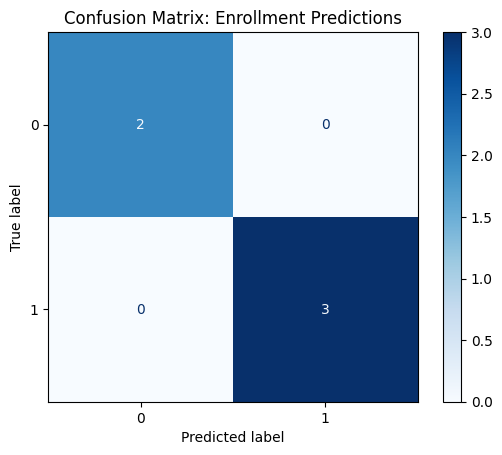

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plotting
# We use the model.classes_ to automatically label (e.g., 0 for 'Not Enrolled', 1 for 'Enrolled')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# 3. Display with a blue color map for readability
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Enrollment Predictions")
plt.show()

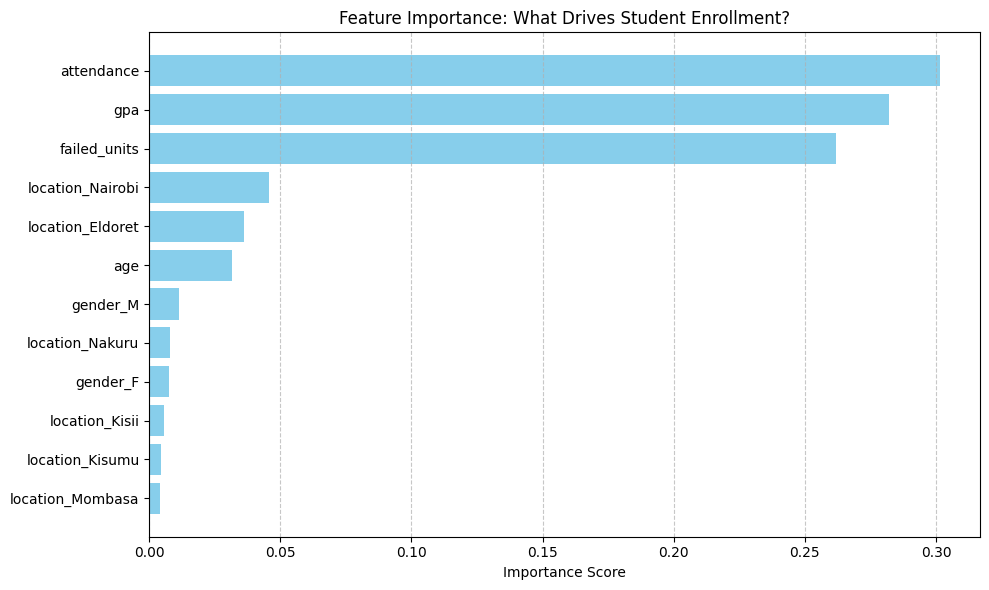

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Extract Feature Names
# Numeric features are just the list you made earlier
feature_names = numeric_cols.copy()

# For categorical features, we need the specific names created by OneHotEncoder
# (e.g., it turns "gender" into "gender_Male" and "gender_Female")
cat_encoder = model.named_steps['preprocess'].named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_cols)

# Combine them into one big list
all_feature_names = np.r_[feature_names, cat_feature_names]

# 2. Get Feature Importances from the Random Forest
importances = model.named_steps['clf'].feature_importances_

# 3. Create a DataFrame to organize and sort them
df_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True) # Sorted for a nice chart

# 4. Plot the Chart
plt.figure(figsize=(10, 6))
plt.barh(df_importance['Feature'], df_importance['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance: What Drives Student Enrollment?')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()